In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
"""
TODO
1. Import and load train and test data.
2. Plot some variables and its relation with the target for choose at least 4 models.
3. Select best variables.
4. Fit the models and make an intepretation of the outcomes.
5. Choose the best model based on the selected metrics
5. Validate with the test data.
"""

'\nTODO\n1. Import and load train and test data.\n2. Plot some variables and its relation with the target for choose at least 4 models.\n3. Select best variables.\n4. Fit the models and make an intepretation of the outcomes.\n5. Choose the best model based on the selected metrics\n5. Validate with the test data.\n'

# 1. Import and load

In [3]:
data_path = '../data/'
os.listdir(data_path)

['.DS_Store',
 'datos_musica_new.csv',
 'audio',
 '.gitignore',
 'spectrograms',
 'datos_musica_new_sa.csv']

In [4]:
df = pd.read_csv(data_path + 'datos_musica_new.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   t_archivo            1173 non-null   object 
 1   c_zero_cr            1173 non-null   int64  
 2   c_spectral_centroid  1173 non-null   float64
 3   c_spectral_bw        1173 non-null   float64
 4   c_spectral_rf        1173 non-null   float64
 5   c_croma              1173 non-null   float64
 6   c_norm_main_signal   1173 non-null   float64
 7   c_norm_amplitude_db  1173 non-null   float64
 8   c_mfcc_1             1173 non-null   float64
 9   c_mfcc_2             1173 non-null   float64
 10  c_mfcc_3             1173 non-null   float64
 11  c_mfcc_4             1173 non-null   float64
 12  c_mfcc_5             1173 non-null   float64
 13  c_mfcc_6             1173 non-null   float64
 14  c_mfcc_7             1173 non-null   float64
 15  c_mfcc_8             1173 non-null   f

# 2. Plot some variables and its relation with the target for choosing at least 4 models.

In [6]:
predictors = list(df.columns)[:-1]
target = list(df.columns).pop(list(df.columns).index('tgt'))
predictors, target

(['t_archivo',
  'c_zero_cr',
  'c_spectral_centroid',
  'c_spectral_bw',
  'c_spectral_rf',
  'c_croma',
  'c_norm_main_signal',
  'c_norm_amplitude_db',
  'c_mfcc_1',
  'c_mfcc_2',
  'c_mfcc_3',
  'c_mfcc_4',
  'c_mfcc_5',
  'c_mfcc_6',
  'c_mfcc_7',
  'c_mfcc_8',
  'c_mfcc_9',
  'c_mfcc_10',
  'c_mfcc_11',
  'c_mfcc_12',
  'c_mfcc_13',
  'c_mfcc_14',
  'c_mfcc_15',
  'c_mfcc_16',
  'c_mfcc_17',
  'c_mfcc_18',
  'c_mfcc_19',
  'c_mfcc_20',
  'c_bpm',
  'c_auto_c'],
 'tgt')

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
cont = [x for x in predictors if 'c_' in x]
cont.append('tgt')
cont

['c_zero_cr',
 'c_spectral_centroid',
 'c_spectral_bw',
 'c_spectral_rf',
 'c_croma',
 'c_norm_main_signal',
 'c_norm_amplitude_db',
 'c_mfcc_1',
 'c_mfcc_2',
 'c_mfcc_3',
 'c_mfcc_4',
 'c_mfcc_5',
 'c_mfcc_6',
 'c_mfcc_7',
 'c_mfcc_8',
 'c_mfcc_9',
 'c_mfcc_10',
 'c_mfcc_11',
 'c_mfcc_12',
 'c_mfcc_13',
 'c_mfcc_14',
 'c_mfcc_15',
 'c_mfcc_16',
 'c_mfcc_17',
 'c_mfcc_18',
 'c_mfcc_19',
 'c_mfcc_20',
 'c_bpm',
 'c_auto_c',
 'tgt']

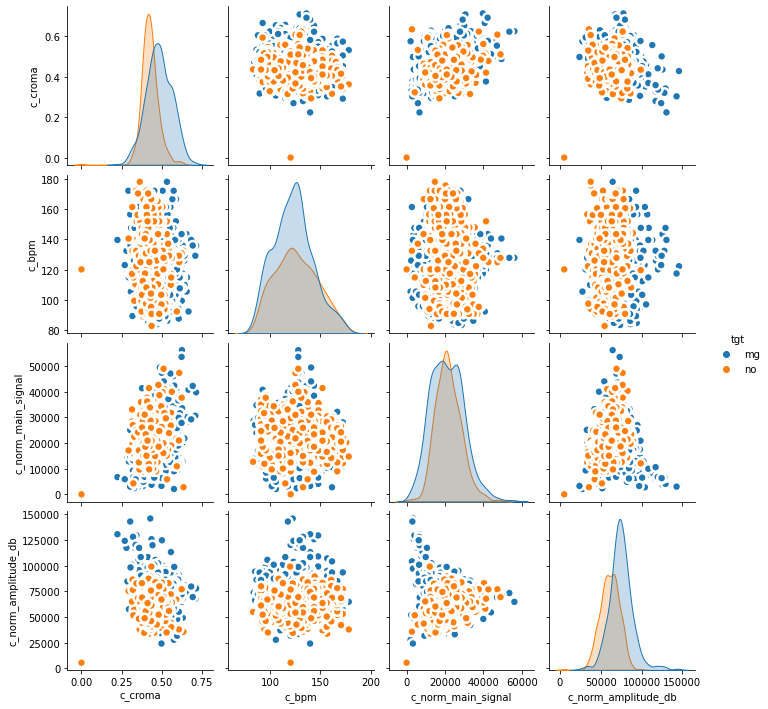

In [9]:
sns.pairplot(df[['c_croma', 'c_bpm', 'c_norm_main_signal', 'c_norm_amplitude_db', 'tgt']], kind="scatter", hue="tgt", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [10]:
df['tgt'].replace({'mg':1, 'no':0}, inplace=True)

# 3. Select best variables.

### Escalado de variables


Para este caso se utilizará minmax escaler, debido a la característica que tiene de manetener la segmentación en los datos y como se dijo, es algo que buscamos en términos de los problemas de clasificación.

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
predictors = [i for i in list(df.columns) if 'c_' in i]
predictors

['c_zero_cr',
 'c_spectral_centroid',
 'c_spectral_bw',
 'c_spectral_rf',
 'c_croma',
 'c_norm_main_signal',
 'c_norm_amplitude_db',
 'c_mfcc_1',
 'c_mfcc_2',
 'c_mfcc_3',
 'c_mfcc_4',
 'c_mfcc_5',
 'c_mfcc_6',
 'c_mfcc_7',
 'c_mfcc_8',
 'c_mfcc_9',
 'c_mfcc_10',
 'c_mfcc_11',
 'c_mfcc_12',
 'c_mfcc_13',
 'c_mfcc_14',
 'c_mfcc_15',
 'c_mfcc_16',
 'c_mfcc_17',
 'c_mfcc_18',
 'c_mfcc_19',
 'c_mfcc_20',
 'c_bpm',
 'c_auto_c']

In [13]:
scaler = MinMaxScaler()
mm_df = df.copy()
mm_df[predictors] = pd.DataFrame(scaler.fit_transform(mm_df[predictors]), columns=predictors)

In [14]:
mm_df.head()

,t_archivo,c_zero_cr,c_spectral_centroid,c_spectral_bw,c_spectral_rf,c_croma,c_norm_main_signal,c_norm_amplitude_db,c_mfcc_1,c_mfcc_2,...,c_mfcc_14,c_mfcc_15,c_mfcc_16,c_mfcc_17,c_mfcc_18,c_mfcc_19,c_mfcc_20,c_bpm,c_auto_c,tgt
0,crop_139ORACION.mp3,0.461538,0.691671,0.856943,0.799567,0.624903,0.484874,0.442076,0.935877,0.560123,...,0.573110,0.465173,0.383546,0.561971,0.327263,0.698667,0.325092,0.261249,0.768760,1
1,crop_08Seek&Destroy.mp3,0.179487,0.732777,0.769774,0.733351,0.731126,0.223710,0.533165,0.886322,0.513376,...,0.580185,0.339448,0.202707,0.416285,0.233565,0.614015,0.197380,0.596472,0.843389,1
2,crop_02Rollercoaster.mp3,0.358974,0.654888,0.806376,0.739129,0.826488,0.459915,0.521129,0.911962,0.636141,...,0.666334,0.457753,0.595504,0.620439,0.441783,0.739533,0.366978,0.154875,0.377498,1
3,crop_11BringEmBackAlive.mp3,0.102564,0.589786,0.758783,0.666030,0.670255,0.542270,0.473539,0.943539,0.625992,...,0.547489,0.324144,0.415986,0.535405,0.331673,0.634874,0.378521,0.486763,0.714016,1
4,crop_4-04BodomBeachTerror.mp3,0.000000,0.563808,0.641427,0.568304,0.853568,0.588552,0.497575,0.962963,0.650882,...,0.467868,0.490342,0.519040,0.586424,0.501406,0.603977,0.376899,0.637105,0.737586,1


In [15]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [16]:
len(predictors)

29

In [17]:
Xt = mm_df[predictors].copy()
yt = mm_df[target].copy()

In [18]:
kb = SelectKBest(k=15)
z = kb.fit_transform(Xt, yt)

In [19]:
filtro = kb.get_support()
var = np.array(Xt.columns)

In [20]:
final_predictors = list(var[filtro])
final_predictors

['c_croma',
 'c_norm_amplitude_db',
 'c_mfcc_3',
 'c_mfcc_4',
 'c_mfcc_5',
 'c_mfcc_6',
 'c_mfcc_7',
 'c_mfcc_8',
 'c_mfcc_10',
 'c_mfcc_11',
 'c_mfcc_12',
 'c_mfcc_14',
 'c_mfcc_16',
 'c_mfcc_18',
 'c_auto_c']

In [21]:
#Para evitar temas de alta dimensionalidad, sólo se trabajaran con las 10 mejores variables

#Revisamos la proporción de los datos
low_dimensionality = mm_df[final_predictors].copy()
mm_df[target].value_counts(), mm_df[target].value_counts(1)

(1    692
 0    481
 Name: tgt, dtype: int64,
 1    0.58994
 0    0.41006
 Name: tgt, dtype: float64)

A partir de este punto se trabajarán dos caminos, uno con el dataset de baja dimensionalidad y otro con todas las variables

In [22]:
# Train test split
from sklearn.model_selection import train_test_split

In [208]:
Xt, Xv, yt, yv = train_test_split(mm_df[predictors], mm_df[target], test_size=0.30, random_state=44567)

In [245]:
Xt_ld, Xv_ld, yt, yv = train_test_split(low_dimensionality, df[target], test_size=0.30, random_state=44567)

In [169]:
Xt.shape, Xt_ld.shape

((821, 29), (821, 15))

In [170]:
Xv.shape, Xv_ld.shape

((352, 29), (352, 15))

In [171]:
yt.shape, yv.shape

((821,), (352,))

# 4. Fit the models and make an intepretation of the outcomes.
Dada la naturaleza de los datos, se tomó la decisión de implementar un arreglo de clasificador votante, una red neuronal, random forest y sólo por comparar los resultados XGBoost y CatBoost. Para este caso nos interesa más un clasificador eficiente en términos de porcentaje de aciertos, por lo que los clasificadores de ensable son una opción interesante.

In [385]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


In [386]:
def metricas(modelo,Xt,Xv,yt,yv):
    print('Métricas:\n\n')
    print('+'*100)
    print('roc:\n')
    print(f'Xtrain: {roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1])}')
    print(f'Xvalidate: {roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1])}\n')
    print('+'*100)
    print('accuracy:\n')
    print(f'Xtrain: {accuracy_score(y_true=yt,y_pred=modelo.predict(Xt))}')
    print(f'Xvalidate: {accuracy_score(y_true=yv,y_pred=modelo.predict(Xv))}')
    print('+'*100)
    print('confusion matrix\n')
    print(f'{confusion_matrix(y_true=yt,y_pred = modelo.predict(Xt))}')
    print(f'{confusion_matrix(y_true=yv, y_pred = modelo.predict(Xv))}')
    print('+'*100)

In [387]:
def plot_confusion_matrix(df=None, title='Matriz de confusion', modelo=None ,cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.title(title + ' - ' +modelo)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

# Red Neuronal

In [388]:
MLPClassifier?

In [389]:
cerebro = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 400 ,300, 200, 100), max_iter=1000, verbose=2,
                      activation='relu', solver='sgd',learning_rate='adaptive')

In [390]:
cerebro.fit(Xt, yt)

Iteration 1, loss = 0.75780674
Iteration 2, loss = 0.75142110
Iteration 3, loss = 0.74242634
Iteration 4, loss = 0.73366576
Iteration 5, loss = 0.72555595
Iteration 6, loss = 0.71866955
Iteration 7, loss = 0.71292664
Iteration 8, loss = 0.70832300
Iteration 9, loss = 0.70413556
Iteration 10, loss = 0.70048723
Iteration 11, loss = 0.69742606
Iteration 12, loss = 0.69473844
Iteration 13, loss = 0.69249009
Iteration 14, loss = 0.69049013
Iteration 15, loss = 0.68885199
Iteration 16, loss = 0.68768497
Iteration 17, loss = 0.68664212
Iteration 18, loss = 0.68574405
Iteration 19, loss = 0.68477006
Iteration 20, loss = 0.68375376
Iteration 21, loss = 0.68291113
Iteration 22, loss = 0.68199988
Iteration 23, loss = 0.68107730
Iteration 24, loss = 0.68024494
Iteration 25, loss = 0.67965167
Iteration 26, loss = 0.67906951
Iteration 27, loss = 0.67860003
Iteration 28, loss = 0.67812074
Iteration 29, loss = 0.67769952
Iteration 30, loss = 0.67736202
Iteration 31, loss = 0.67701075
Iteration 32, los

Iteration 256, loss = 0.30799250
Iteration 257, loss = 0.30916073
Iteration 258, loss = 0.30676691
Iteration 259, loss = 0.30386121
Iteration 260, loss = 0.30507253
Iteration 261, loss = 0.30440770
Iteration 262, loss = 0.30452877
Iteration 263, loss = 0.30004417
Iteration 264, loss = 0.30002412
Iteration 265, loss = 0.31634092
Iteration 266, loss = 0.31192240
Iteration 267, loss = 0.29894738
Iteration 268, loss = 0.29776230
Iteration 269, loss = 0.29655427
Iteration 270, loss = 0.29517514
Iteration 271, loss = 0.30628733
Iteration 272, loss = 0.29970208
Iteration 273, loss = 0.29150675
Iteration 274, loss = 0.29338162
Iteration 275, loss = 0.29943548
Iteration 276, loss = 0.28926206
Iteration 277, loss = 0.29061907
Iteration 278, loss = 0.28729606
Iteration 279, loss = 0.29051379
Iteration 280, loss = 0.28498450
Iteration 281, loss = 0.28574907
Iteration 282, loss = 0.28579655
Iteration 283, loss = 0.28886195
Iteration 284, loss = 0.28379168
Iteration 285, loss = 0.29526730
Iteration 

MLPClassifier(hidden_layer_sizes=(100, 200, 300, 400, 300, 200, 100),
              learning_rate='adaptive', max_iter=1000, solver='sgd', verbose=2)

In [391]:
print(classification_report(yt, cerebro.predict(Xt)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       342
           1       0.93      0.90      0.91       479

    accuracy                           0.90       821
   macro avg       0.90      0.90      0.90       821
weighted avg       0.90      0.90      0.90       821



In [392]:
print(classification_report(yv, cerebro.predict(Xv)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       139
           1       0.91      0.91      0.91       213

    accuracy                           0.89       352
   macro avg       0.88      0.88      0.88       352
weighted avg       0.89      0.89      0.89       352



In [393]:
metricas(cerebro, Xt, Xv, yt, yv)

Métricas:


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
roc:

Xtrain: 0.9641675517952851
Xvalidate: 0.9480528253453575

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
accuracy:

Xtrain: 0.9001218026796589
Xvalidate: 0.8863636363636364
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion matrix

[[307  35]
 [ 47 432]]
[[119  20]
 [ 20 193]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


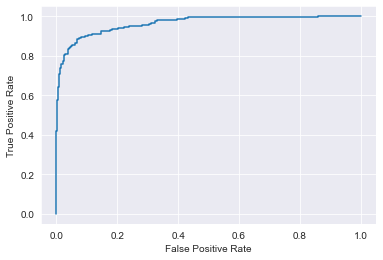

In [394]:
fpr, tpr, _ = metrics.roc_curve(yt, cerebro.predict_proba(Xt)[::,1])
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

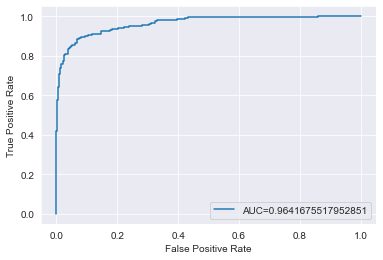

In [395]:
auc = metrics.roc_auc_score(yt, cerebro.predict_proba(Xt)[::,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

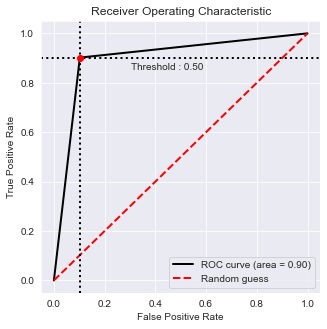

In [396]:
bc = BinaryClassification(yt, cerebro.predict(Xt), labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()


In [397]:
df_confusion = pd.crosstab(yt, cerebro.predict(Xt), rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted    0    1
Actual             
0          307   35
1           47  432


In [398]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1
Actual                       
0          0.897661  0.073069
1          0.137427  0.901879


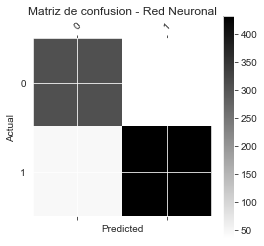

In [399]:
plot_confusion_matrix(df=df_confusion, modelo="Red Neuronal")

# Red neuronal para data set de baja dimensionalidad

In [400]:
cerebro = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 400 ,300, 200, 100), max_iter=1000, verbose=2,
                      activation='relu', solver='sgd', learning_rate='adaptive')

In [401]:
cerebro.fit(Xt_ld, yt)

Iteration 1, loss = 0.68313590
Iteration 2, loss = 0.68262403
Iteration 3, loss = 0.68185717
Iteration 4, loss = 0.68120188
Iteration 5, loss = 0.68041360
Iteration 6, loss = 0.67976534
Iteration 7, loss = 0.67912931
Iteration 8, loss = 0.67848711
Iteration 9, loss = 0.67797783
Iteration 10, loss = 0.67757835
Iteration 11, loss = 0.67724037
Iteration 12, loss = 0.67696665
Iteration 13, loss = 0.67670508
Iteration 14, loss = 0.67640954
Iteration 15, loss = 0.67615785
Iteration 16, loss = 0.67591106
Iteration 17, loss = 0.67570514
Iteration 18, loss = 0.67540851
Iteration 19, loss = 0.67516507
Iteration 20, loss = 0.67485398
Iteration 21, loss = 0.67466930
Iteration 22, loss = 0.67445024
Iteration 23, loss = 0.67424243
Iteration 24, loss = 0.67405224
Iteration 25, loss = 0.67371555
Iteration 26, loss = 0.67344474
Iteration 27, loss = 0.67318127
Iteration 28, loss = 0.67293008
Iteration 29, loss = 0.67271047
Iteration 30, loss = 0.67243714
Iteration 31, loss = 0.67218039
Iteration 32, los

Iteration 255, loss = 0.32518392
Iteration 256, loss = 0.32012506
Iteration 257, loss = 0.32011578
Iteration 258, loss = 0.32128258
Iteration 259, loss = 0.32068991
Iteration 260, loss = 0.32250277
Iteration 261, loss = 0.31891795
Iteration 262, loss = 0.31946500
Iteration 263, loss = 0.31971993
Iteration 264, loss = 0.31769096
Iteration 265, loss = 0.31714874
Iteration 266, loss = 0.31903130
Iteration 267, loss = 0.31984571
Iteration 268, loss = 0.31563219
Iteration 269, loss = 0.32012447
Iteration 270, loss = 0.31780968
Iteration 271, loss = 0.31627674
Iteration 272, loss = 0.31692513
Iteration 273, loss = 0.31589656
Iteration 274, loss = 0.31582877
Iteration 275, loss = 0.32136895
Iteration 276, loss = 0.31400998
Iteration 277, loss = 0.31475417
Iteration 278, loss = 0.31591237
Iteration 279, loss = 0.31621330
Iteration 280, loss = 0.31432161
Iteration 281, loss = 0.31186830
Iteration 282, loss = 0.31478250
Iteration 283, loss = 0.31846961
Iteration 284, loss = 0.31140113
Iteration 

Iteration 503, loss = 0.27320105
Iteration 504, loss = 0.27487500
Iteration 505, loss = 0.27695496
Iteration 506, loss = 0.27551564
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 507, loss = 0.27339727
Iteration 508, loss = 0.27313943
Iteration 509, loss = 0.27294273
Iteration 510, loss = 0.27267975
Iteration 511, loss = 0.27277161
Iteration 512, loss = 0.27266157
Iteration 513, loss = 0.27260148
Iteration 514, loss = 0.27260384
Iteration 515, loss = 0.27259063
Iteration 516, loss = 0.27251917
Iteration 517, loss = 0.27259669
Iteration 518, loss = 0.27283412
Iteration 519, loss = 0.27313578
Iteration 520, loss = 0.27342670
Iteration 521, loss = 0.27336241
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 522, loss = 0.27294089
Iteration 523, loss = 0.27277704
Iteration 524, loss = 0.27269515
Iteration 525, loss = 0.27264495
Iteration 526

MLPClassifier(hidden_layer_sizes=(100, 200, 300, 400, 300, 200, 100),
              learning_rate='adaptive', max_iter=1000, solver='sgd', verbose=2)

In [402]:
print(classification_report(yt, cerebro.predict(Xt_ld)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       342
           1       0.91      0.89      0.90       479

    accuracy                           0.89       821
   macro avg       0.88      0.89      0.88       821
weighted avg       0.89      0.89      0.89       821



In [403]:
print(classification_report(yv, cerebro.predict(Xv_ld)))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       139
           1       0.90      0.85      0.87       213

    accuracy                           0.85       352
   macro avg       0.84      0.85      0.85       352
weighted avg       0.86      0.85      0.85       352



In [404]:
metricas(cerebro, Xt_ld, Xv_ld, yt, yv)

Métricas:


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
roc:

Xtrain: 0.9524533323566398
Xvalidate: 0.9330563718039653

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
accuracy:

Xtrain: 0.8855054811205847
Xvalidate: 0.8522727272727273
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion matrix

[[302  40]
 [ 54 425]]
[[119  20]
 [ 32 181]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


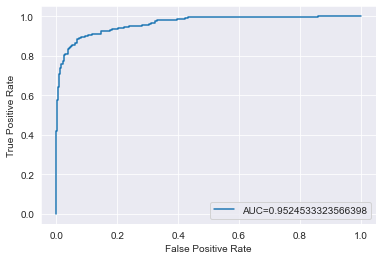

In [405]:
auc = metrics.roc_auc_score(yt, cerebro.predict_proba(Xt_ld)[::,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [406]:
df_confusion = pd.crosstab(yt, cerebro.predict(Xt_ld), rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted    0    1
Actual             
0          302   40
1           54  425


In [407]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1
Actual                       
0          0.883041  0.083507
1          0.157895  0.887265


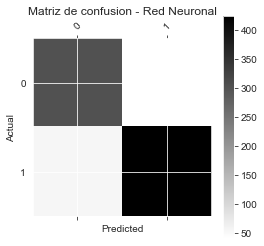

In [408]:
plot_confusion_matrix(df=df_confusion, modelo="Red Neuronal")

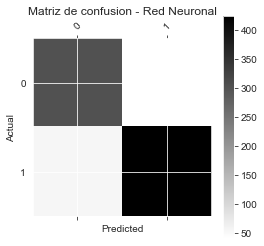

In [409]:
plot_confusion_matrix(df=df_conf_norm, modelo='Red Neuronal') 

# Ensamble clasificador votante

In [410]:
label = ['nb', 'lr', 'knn', 'tree', 'lda', 'rc']


models = [GaussianNB(), 
          LogisticRegression(C=242012826.47943833, max_iter=600, penalty='l2', solver='lbfgs'), 
          KNeighborsClassifier(n_neighbors=2, weights='distance', metric='manhattan',n_jobs=8),
          DecisionTreeClassifier(max_depth=5),
          LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto'),
          RidgeClassifier(alpha=0.5)]


models = dict(zip(label, models))
resultados = {}

for l in label:
    
    print(f'Comenzando con el modelo: {l}...\n')
    aux_dict = {}
    clf = models.get(l)
    clf.fit(Xt, yt)
    
    print('Entrenamiento: \n')
    predictions = clf.predict(Xt)
    print(classification_report(yt, predictions))
    print('Matriz: \n')
    print(confusion_matrix(yt, predictions))
    
    train_score = recall_score(yt, predictions)
    
    print('Validación: \n')
    predictions = clf.predict(Xv)
    print(classification_report(yv, predictions))
    print('Matriz: \n')
    print(confusion_matrix(yv, predictions))    
    
    test_score = recall_score(yv, predictions)
    
    aux_dict['model'] = clf
    aux_dict['test_score'] = test_score
    aux_dict['train_score'] = train_score
    
    print(f'Train score: {train_score}.\n')
    print(f'Test score: {test_score}.\n')    
    
    resultados[l] = aux_dict
    print(f'Terminando con el modelo: {l}.\n')

Comenzando con el modelo: nb...

Entrenamiento: 

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       342
           1       0.91      0.83      0.87       479

    accuracy                           0.85       821
   macro avg       0.85      0.86      0.85       821
weighted avg       0.86      0.85      0.85       821

Matriz: 

[[303  39]
 [ 81 398]]
Validación: 

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       139
           1       0.88      0.78      0.83       213

    accuracy                           0.80       352
   macro avg       0.80      0.81      0.80       352
weighted avg       0.82      0.80      0.81       352

Matriz: 

[[117  22]
 [ 47 166]]
Train score: 0.8308977035490606.

Test score: 0.7793427230046949.

Terminando con el modelo: nb.

Comenzando con el modelo: lr...

Entrenamiento: 

              precision    recall  f1-score   support

           0 

In [411]:
Xt_n = Xt.copy()
Xt_n['estimated'] = ((resultados.get('nb').get('model').predict(Xt)*1) + 
               (resultados.get('lr').get('model').predict(Xt)*4) + 
               resultados.get('knn').get('model').predict(Xt)*2 + 
               resultados.get('tree').get('model').predict(Xt)*4 + 
               resultados.get('lda').get('model').predict(Xt)*3 + 
              resultados.get('rc').get('model').predict(Xt)*1)
                

n_votos = 6 # Número de votos de los modelos, para que sea considerado un evento
Xt_n['estimated_2'] = np.where(Xt_n['estimated']>=n_votos, 1, 0)#Regla de cuántos votos resultarían en que la clasificación sea positiva

Xt_n.head()

,c_zero_cr,c_spectral_centroid,c_spectral_bw,c_spectral_rf,c_croma,c_norm_main_signal,c_norm_amplitude_db,c_mfcc_1,c_mfcc_2,c_mfcc_3,...,c_mfcc_15,c_mfcc_16,c_mfcc_17,c_mfcc_18,c_mfcc_19,c_mfcc_20,c_bpm,c_auto_c,estimated,estimated_2
1106,0.179487,0.497362,0.664835,0.542111,0.543171,0.369004,0.497667,0.841203,0.611958,0.601742,...,0.311612,0.482817,0.317454,0.316041,0.359228,0.266861,0.596472,0.446953,0,0
1018,0.256410,0.434784,0.656544,0.463835,0.574743,0.398280,0.408289,0.861111,0.665320,0.572985,...,0.757336,0.446470,0.529914,0.620547,0.478148,0.300032,0.770061,0.720551,4,0
196,0.051282,0.393919,0.598420,0.382936,0.544503,0.171695,0.413761,0.817982,0.700007,0.488158,...,0.577950,0.377269,0.544647,0.593263,0.447710,0.221524,0.392362,0.821328,15,1
320,0.128205,0.571266,0.767503,0.631360,0.766442,0.508406,0.467956,0.943155,0.650964,0.395505,...,0.535722,0.595150,0.528888,0.427539,0.726007,0.293192,0.680060,0.834973,15,1
282,0.153846,0.507271,0.596523,0.520329,0.647446,0.362116,0.506256,0.904480,0.735364,0.273709,...,0.540613,0.183804,0.446309,0.344984,0.492359,0.365327,0.422330,0.759731,15,1


In [412]:
ytpred = Xt_n['estimated_2'].copy()

In [413]:
print(classification_report(yt, ytpred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       342
           1       0.93      0.96      0.94       479

    accuracy                           0.93       821
   macro avg       0.93      0.93      0.93       821
weighted avg       0.93      0.93      0.93       821



In [414]:
Xv_n = Xv.copy()
Xv_n['estimated'] = ((resultados.get('nb').get('model').predict(Xv)*1) + 
               (resultados.get('lr').get('model').predict(Xv)*4) + 
               resultados.get('knn').get('model').predict(Xv)*2 + 
               resultados.get('tree').get('model').predict(Xv)*4 + 
               resultados.get('lda').get('model').predict(Xv)*3 + 
              resultados.get('rc').get('model').predict(Xv)*1)
                

n_votos = 6 # Número de votos de los modelos, para que sea considerado un evento
Xv_n['estimated_2'] = np.where(Xv_n['estimated']>=n_votos, 1, 0)#Regla de cuántos votos resultarían en que la clasificación sea positiva

Xv_n.head()

,c_zero_cr,c_spectral_centroid,c_spectral_bw,c_spectral_rf,c_croma,c_norm_main_signal,c_norm_amplitude_db,c_mfcc_1,c_mfcc_2,c_mfcc_3,...,c_mfcc_15,c_mfcc_16,c_mfcc_17,c_mfcc_18,c_mfcc_19,c_mfcc_20,c_bpm,c_auto_c,estimated,estimated_2
386,0.282051,0.915815,0.968669,1.000000,0.809223,0.753731,0.439002,0.990661,0.447319,0.466382,...,0.565132,0.596220,0.728539,0.541320,0.794939,0.394828,0.637105,0.494784,15,1
274,0.153846,0.520125,0.606315,0.540053,0.776174,0.310126,0.542333,0.871312,0.653104,0.350325,...,0.411248,0.534138,0.515064,0.500902,0.674318,0.375150,0.825033,0.563929,15,1
842,0.230769,0.586370,0.748605,0.647858,0.573410,0.327390,0.374396,0.882933,0.544252,0.474436,...,0.360120,0.450240,0.554953,0.353825,0.569246,0.290166,0.521457,0.697026,0,0
420,0.666667,0.779290,0.871767,0.823632,0.668997,0.560760,0.283744,0.981172,0.520854,0.353716,...,0.743723,0.500297,0.742838,0.475724,0.578989,0.492309,0.472537,0.832202,8,1
591,0.333333,0.488048,0.629786,0.516542,0.792793,0.314481,0.477710,0.845318,0.628262,0.547363,...,0.529904,0.550975,0.598783,0.338724,0.628049,0.365087,0.879592,0.345096,15,1


In [415]:
yvpred = Xv_n['estimated_2'].copy()

In [416]:
print(classification_report(yv, yvpred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       139
           1       0.90      0.93      0.91       213

    accuracy                           0.89       352
   macro avg       0.89      0.88      0.89       352
weighted avg       0.89      0.89      0.89       352



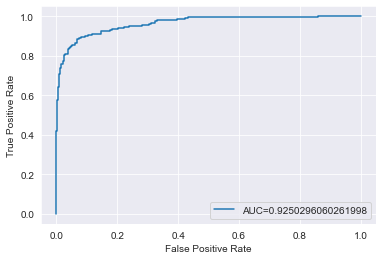

In [417]:
auc = metrics.roc_auc_score(yt, ytpred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

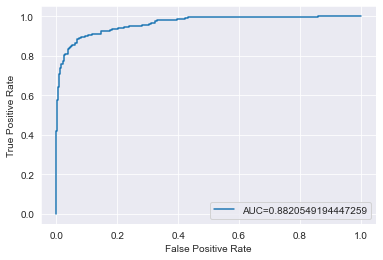

In [418]:
auc = metrics.roc_auc_score(yv, yvpred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Clasificador votant con menor dimensionalidad

In [419]:
label = ['nb', 'lr', 'knn', 'tree', 'lda', 'rc']


models = [GaussianNB(), 
          LogisticRegression(C=242012826.47943833, max_iter=500, penalty='l2', solver='lbfgs'), 
          KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean',n_jobs=8),
          DecisionTreeClassifier(max_depth=10),
          LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto'),
          RidgeClassifier(alpha=0.5)]


models = dict(zip(label, models))
resultados = {}

for l in label:
    
    print(f'Comenzando con el modelo: {l}...\n')
    aux_dict = {}
    clf = models.get(l)
    clf.fit(Xt_ld, yt)
    
    print('Entrenamiento: \n')
    predictions = clf.predict(Xt_ld)
    print(classification_report(yt, predictions))
    print('Matriz: \n')
    print(confusion_matrix(yt, predictions))
    
    train_score = recall_score(yt, predictions)
    
    print('Validación: \n')
    predictions = clf.predict(Xv_ld)
    print(classification_report(yv, predictions))
    print('Matriz: \n')
    print(confusion_matrix(yv, predictions))    
    
    test_score = recall_score(yv, predictions)
    
    aux_dict['model'] = clf
    aux_dict['test_score'] = test_score
    aux_dict['train_score'] = train_score
    
    print(f'Train score: {train_score}.\n')
    print(f'Test score: {test_score}.\n')    
    
    resultados[l] = aux_dict
    print(f'Terminando con el modelo: {l}.\n')

Comenzando con el modelo: nb...

Entrenamiento: 

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       342
           1       0.90      0.84      0.87       479

    accuracy                           0.85       821
   macro avg       0.85      0.86      0.85       821
weighted avg       0.86      0.85      0.85       821

Matriz: 

[[299  43]
 [ 78 401]]
Validación: 

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       139
           1       0.91      0.80      0.85       213

    accuracy                           0.83       352
   macro avg       0.83      0.84      0.83       352
weighted avg       0.84      0.83      0.83       352

Matriz: 

[[122  17]
 [ 42 171]]
Train score: 0.837160751565762.

Test score: 0.8028169014084507.

Terminando con el modelo: nb.

Comenzando con el modelo: lr...

Entrenamiento: 

              precision    recall  f1-score   support

           0  

In [420]:
Xt_ld_n = Xt_ld.copy()
Xt_ld_n['estimated'] = ((resultados.get('nb').get('model').predict(Xt_ld)*1) + 
               (resultados.get('lr').get('model').predict(Xt_ld)*2) + 
               resultados.get('knn').get('model').predict(Xt_ld)*1 + 
               resultados.get('tree').get('model').predict(Xt_ld)*3 + 
               resultados.get('lda').get('model').predict(Xt_ld)*4 + 
              resultados.get('rc').get('model').predict(Xt_ld)*4)
                

n_votos = 6 # Número de votos de los modelos, para que sea considerado un evento
Xt_ld_n['estimated_2'] = np.where(Xt_ld_n['estimated']>=n_votos, 1, 0)#Regla de cuántos votos resultarían en que la clasificación sea positiva

Xt_ld_n.head()

,c_croma,c_norm_amplitude_db,c_mfcc_3,c_mfcc_4,c_mfcc_5,c_mfcc_6,c_mfcc_7,c_mfcc_8,c_mfcc_10,c_mfcc_11,c_mfcc_12,c_mfcc_14,c_mfcc_16,c_mfcc_18,c_auto_c,estimated,estimated_2
1106,0.543171,0.497667,0.601742,0.565896,0.361990,0.579125,0.483712,0.541116,0.425765,0.321230,0.495292,0.389442,0.482817,0.316041,0.446953,0,0
1018,0.574743,0.408289,0.572985,0.498248,0.537027,0.615140,0.366662,0.498406,0.552622,0.731103,0.483824,0.440206,0.446470,0.620547,0.720551,10,1
196,0.544503,0.413761,0.488158,0.435257,0.747340,0.518844,0.449735,0.672865,0.557921,0.522620,0.570060,0.432790,0.377269,0.593263,0.821328,15,1
320,0.766442,0.467956,0.395505,0.534554,0.432685,0.754074,0.389952,0.936682,0.933300,0.392553,0.609624,0.795293,0.595150,0.427539,0.834973,15,1
282,0.647446,0.506256,0.273709,0.667004,0.349157,0.706988,0.357874,0.580313,0.454118,0.534559,0.366481,0.208139,0.183804,0.344984,0.759731,15,1


In [421]:
ypred = Xt_ld_n['estimated_2'].copy()

In [422]:
print(classification_report(yt, ypred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       342
           1       0.88      0.88      0.88       479

    accuracy                           0.86       821
   macro avg       0.85      0.85      0.85       821
weighted avg       0.86      0.86      0.86       821



In [423]:
Xv_ld_n = Xv_ld.copy()
Xv_ld_n['estimated'] = ((resultados.get('nb').get('model').predict(Xv_ld)*1) + 
               (resultados.get('lr').get('model').predict(Xv_ld)*2) + 
               resultados.get('knn').get('model').predict(Xv_ld)*1 + 
               resultados.get('tree').get('model').predict(Xv_ld)*3 + 
               resultados.get('lda').get('model').predict(Xv_ld)*4 + 
              resultados.get('rc').get('model').predict(Xv_ld)*4)
                

n_votos = 6 # Número de votos de los modelos, para que sea considerado un evento
Xv_ld_n['estimated_2'] = np.where(Xv_n['estimated']>=n_votos, 1, 0)#Regla de cuántos votos resultarían en que la clasificación sea positiva

Xv_ld_n.head()

,c_croma,c_norm_amplitude_db,c_mfcc_3,c_mfcc_4,c_mfcc_5,c_mfcc_6,c_mfcc_7,c_mfcc_8,c_mfcc_10,c_mfcc_11,c_mfcc_12,c_mfcc_14,c_mfcc_16,c_mfcc_18,c_auto_c,estimated,estimated_2
386,0.809223,0.439002,0.466382,0.609169,0.071609,0.770282,0.193844,0.954544,0.958767,0.393956,0.864236,0.770303,0.596220,0.541320,0.494784,15,1
274,0.776174,0.542333,0.350325,0.783946,0.670161,0.571159,0.543474,0.588877,0.574695,0.557576,0.645111,0.633195,0.534138,0.500902,0.563929,15,1
842,0.573410,0.374396,0.474436,0.547532,0.295344,0.635247,0.294543,0.492504,0.576354,0.408868,0.489874,0.715163,0.450240,0.353825,0.697026,0,0
420,0.668997,0.283744,0.353716,0.601753,0.194332,0.595140,0.348738,0.663178,0.606379,0.570165,0.529465,0.441598,0.500297,0.475724,0.832202,12,1
591,0.792793,0.477710,0.547363,0.596352,0.664650,0.646825,0.509114,0.761473,0.664791,0.567527,0.814644,0.593788,0.550975,0.338724,0.345096,15,1


In [424]:
ypred = Xv_ld_n['estimated_2'].copy()

In [425]:
print(classification_report(yv, ypred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       139
           1       0.90      0.93      0.91       213

    accuracy                           0.89       352
   macro avg       0.89      0.88      0.89       352
weighted avg       0.89      0.89      0.89       352



Los resultados para menor dimensionalidad son incluso peores

# Random Forest

In [426]:
RandomForestClassifier?

In [427]:
bosque = RandomForestClassifier(n_jobs=8, max_depth=5)

In [428]:
bosque.fit(Xt, yt)

RandomForestClassifier(max_depth=5, n_jobs=8)

In [429]:
prediccion_bosque = bosque.predict(Xt)

In [430]:
print(classification_report(yt, prediccion_bosque))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       342
           1       0.98      0.94      0.96       479

    accuracy                           0.95       821
   macro avg       0.95      0.95      0.95       821
weighted avg       0.95      0.95      0.95       821



In [431]:
print(classification_report(yv, bosque.predict(Xv)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       139
           1       0.91      0.90      0.90       213

    accuracy                           0.88       352
   macro avg       0.88      0.88      0.88       352
weighted avg       0.88      0.88      0.88       352



Sobre ajuste horrible

In [432]:
metricas(bosque, Xt, Xv, yt, yv)

Métricas:


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
roc:

Xtrain: 0.9878462684198317
Xvalidate: 0.9414327692775356

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
accuracy:

Xtrain: 0.951278928136419
Xvalidate: 0.8835227272727273
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion matrix

[[331  11]
 [ 29 450]]
[[119  20]
 [ 21 192]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


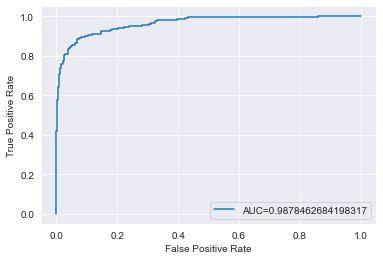

In [433]:
auc = metrics.roc_auc_score(yt, bosque.predict_proba(Xt)[::,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [434]:
df_confusion = pd.crosstab(yt, bosque.predict(Xt), rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted    0    1
Actual             
0          331   11
1           29  450


In [435]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1
Actual                       
0          0.967836  0.022965
1          0.084795  0.939457


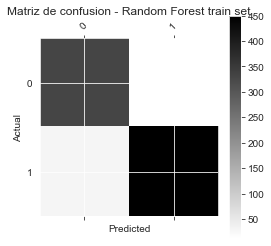

In [436]:
plot_confusion_matrix(df=df_conf_norm, modelo='Random Forest train set') 

In [437]:
df_confusion = pd.crosstab(yv, bosque.predict(Xv), rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted    0    1
Actual             
0          119   20
1           21  192


In [438]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1
Actual                       
0          0.856115  0.093897
1          0.151079  0.901408


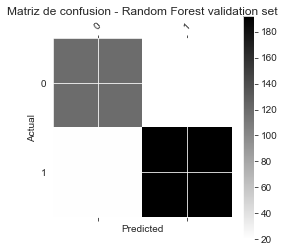

In [439]:
plot_confusion_matrix(df=df_conf_norm, modelo='Random Forest validation set') 

### Debido a los resultados otenidos con Random Forest, se va a optar por nisiquiera intentarlo con el data set de las mejores variables

# XGBoost

In [440]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_God = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=8,
    seed=6542
)

parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(100, 500, 100),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=xgb_God,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 8,
    cv = 10,
    verbose=True
)

In [441]:
%%time
grid_search.fit(Xt, yt)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
CPU times: user 2.03 s, sys: 643 ms, total: 2.67 s
Wall time: 3min 26s


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=8,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=8,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10, 2),
                         'n_estimators': range(100, 500, 100)},
             scoring='roc_auc', verbose=True)

In [442]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 400}

In [443]:
eval_set_ = [(Xv, yv)]

In [444]:
xgb_b = xgb.XGBClassifier(learning_rate=0.05, max_depth=4, n_estimators=200,
                          booster='dart', eval_metric='auc')

In [445]:
xgb_b.fit(Xt, yt, eval_set=eval_set_)

[0]	validation_0-auc:0.86086
[1]	validation_0-auc:0.86751
[2]	validation_0-auc:0.86711
[3]	validation_0-auc:0.86890
[4]	validation_0-auc:0.87248
[5]	validation_0-auc:0.88479
[6]	validation_0-auc:0.89055
[7]	validation_0-auc:0.90620
[8]	validation_0-auc:0.90772
[9]	validation_0-auc:0.90894
[10]	validation_0-auc:0.91097
[11]	validation_0-auc:0.91418
[12]	validation_0-auc:0.91554
[13]	validation_0-auc:0.91615
[14]	validation_0-auc:0.91804
[15]	validation_0-auc:0.91975
[16]	validation_0-auc:0.92230
[17]	validation_0-auc:0.92169
[18]	validation_0-auc:0.92362
[19]	validation_0-auc:0.92497
[20]	validation_0-auc:0.92704
[21]	validation_0-auc:0.92789
[22]	validation_0-auc:0.92885
[23]	validation_0-auc:0.93150
[24]	validation_0-auc:0.93191
[25]	validation_0-auc:0.93204
[26]	validation_0-auc:0.93204
[27]	validation_0-auc:0.93279
[28]	validation_0-auc:0.93397
[29]	validation_0-auc:0.93493
[30]	validation_0-auc:0.93517
[31]	validation_0-auc:0.93527
[32]	validation_0-auc:0.93618
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [446]:
print(classification_report(yt, xgb_b.predict(Xt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       479

    accuracy                           1.00       821
   macro avg       1.00      1.00      1.00       821
weighted avg       1.00      1.00      1.00       821



In [447]:
print(classification_report(yv, xgb_b.predict(Xv)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       139
           1       0.91      0.90      0.90       213

    accuracy                           0.88       352
   macro avg       0.88      0.88      0.88       352
weighted avg       0.88      0.88      0.88       352



In [448]:
metricas(xgb_b, Xt, Xv, yt, yv)

Métricas:


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
roc:

Xtrain: 0.9999938956647009
Xvalidate: 0.955584827912318

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
accuracy:

Xtrain: 0.9987819732034104
Xvalidate: 0.8835227272727273
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion matrix

[[341   1]
 [  0 479]]
[[120  19]
 [ 22 191]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


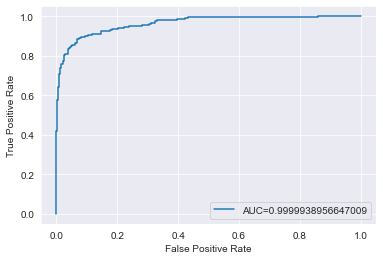

In [449]:
auc = metrics.roc_auc_score(yt, xgb_b.predict_proba(Xt)[::,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

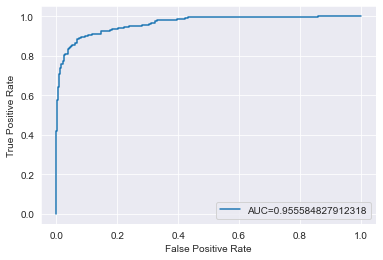

In [450]:
auc = metrics.roc_auc_score(yv, xgb_b.predict_proba(Xv)[::,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Regresión logística

In [451]:
grid={"C":np.logspace(-10,10, 100), "penalty":["l1","l2", "elasticnet"], "max_iter":[100,200, 300, 400, 500],
     "solver":["newton-cg", 'lbfgs', 'liblinear']}

lr=LogisticRegression()
lr_cv=GridSearchCV(lr,grid,cv=10)
lr_cv.fit(Xt,yt)

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sqpr14_/

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [452]:
print("Hiper parámetros :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

Hiper parámetros :(best parameters)  {'C': 572236.765935022, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8806788128122245


In [453]:
LogisticRegression?

In [454]:
lr = LogisticRegression(C=242012826.47943833, max_iter=500, penalty='l2', solver='lbfgs')

In [455]:
lr.fit(Xt, yt)

LogisticRegression(C=242012826.47943833, max_iter=500)

In [456]:
print(classification_report(yt, lr.predict(Xt)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       342
           1       0.90      0.90      0.90       479

    accuracy                           0.88       821
   macro avg       0.88      0.88      0.88       821
weighted avg       0.88      0.88      0.88       821



In [457]:
print(classification_report(yv, xgb_b.predict(Xv)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       139
           1       0.91      0.90      0.90       213

    accuracy                           0.88       352
   macro avg       0.88      0.88      0.88       352
weighted avg       0.88      0.88      0.88       352



In [458]:
metricas(lr, Xt, Xv, yt, yv)

Métricas:


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
roc:

Xtrain: 0.9575504523312457
Xvalidate: 0.9558888100786975

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
accuracy:

Xtrain: 0.8830694275274056
Xvalidate: 0.8892045454545454
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion matrix

[[294  48]
 [ 48 431]]
[[118  21]
 [ 18 195]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


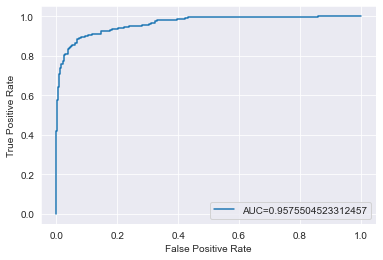

In [459]:
auc = metrics.roc_auc_score(yt, lr.predict_proba(Xt)[::,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

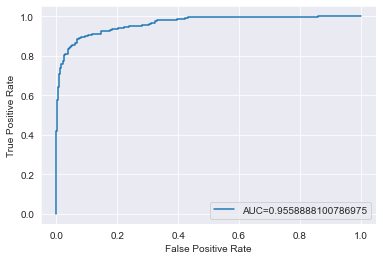

In [460]:
auc = metrics.roc_auc_score(yv, lr.predict_proba(Xv)[::,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [461]:
from plot_metric.functions import BinaryClassification

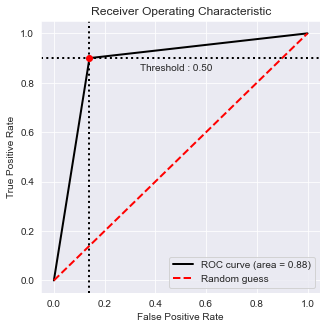

In [462]:
bc = BinaryClassification(yt, lr.predict(Xt), labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()


In [463]:
from catboost import CatBoostClassifier, Pool, metrics, cv

In [464]:
tuleka = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=1,
    logging_level='Verbose',
    task_type='CPU',
    reg_lambda=2,
    max_depth=1,
    
)

In [469]:
tuleka.fit(Xt, yt, early_stopping_rounds=50, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6842578	total: 332us	remaining: 332ms
1:	learn: 0.6761402	total: 691us	remaining: 345ms
2:	learn: 0.6684468	total: 1.01ms	remaining: 337ms
3:	learn: 0.6618430	total: 1.44ms	remaining: 359ms
4:	learn: 0.6557455	total: 1.75ms	remaining: 348ms
5:	learn: 0.6482870	total: 2.13ms	remaining: 352ms
6:	learn: 0.6409604	total: 2.74ms	remaining: 388ms
7:	learn: 0.6339802	total: 3.12ms	remaining: 387ms
8:	learn: 0.6276364	total: 3.46ms	remaining: 381ms
9:	learn: 0.6214117	total: 3.81ms	remaining: 377ms
10:	learn: 0.6157549	total: 4.18ms	remaining: 376ms
11:	learn: 0.6112325	total: 4.51ms	remaining: 371ms
12:	learn: 0.6051376	total: 4.8ms	remaining: 365ms
13:	learn: 0.5997730	total: 5.14ms	remaining: 362ms
14:	learn: 0.5955713	total: 5.51ms	remaining: 362ms
15:	learn: 0.5906416	total: 5.87ms	remaining: 361ms
16:	learn: 0.5857158	total: 6.21ms	remaining: 359ms
17:	learn: 0.5817733	total: 6.57ms	remaining: 358ms
18:	learn: 0.5779715	total: 6.99ms	remaining: 361ms
19:	learn: 0.5745895	tota

405:	learn: 0.2820321	total: 161ms	remaining: 236ms
406:	learn: 0.2818286	total: 162ms	remaining: 235ms
407:	learn: 0.2815708	total: 162ms	remaining: 235ms
408:	learn: 0.2812862	total: 162ms	remaining: 235ms
409:	learn: 0.2810786	total: 163ms	remaining: 234ms
410:	learn: 0.2808699	total: 163ms	remaining: 234ms
411:	learn: 0.2806181	total: 163ms	remaining: 233ms
412:	learn: 0.2804133	total: 164ms	remaining: 233ms
413:	learn: 0.2802129	total: 164ms	remaining: 232ms
414:	learn: 0.2799821	total: 165ms	remaining: 232ms
415:	learn: 0.2797834	total: 165ms	remaining: 231ms
416:	learn: 0.2791968	total: 165ms	remaining: 231ms
417:	learn: 0.2790032	total: 166ms	remaining: 231ms
418:	learn: 0.2787789	total: 166ms	remaining: 230ms
419:	learn: 0.2785874	total: 166ms	remaining: 230ms
420:	learn: 0.2783867	total: 167ms	remaining: 229ms
421:	learn: 0.2781970	total: 167ms	remaining: 229ms
422:	learn: 0.2780042	total: 168ms	remaining: 229ms
423:	learn: 0.2777632	total: 168ms	remaining: 228ms
424:	learn: 

600:	learn: 0.2464100	total: 243ms	remaining: 161ms
601:	learn: 0.2462675	total: 243ms	remaining: 161ms
602:	learn: 0.2461333	total: 244ms	remaining: 161ms
603:	learn: 0.2459161	total: 244ms	remaining: 160ms
604:	learn: 0.2457949	total: 245ms	remaining: 160ms
605:	learn: 0.2456707	total: 245ms	remaining: 159ms
606:	learn: 0.2453497	total: 246ms	remaining: 159ms
607:	learn: 0.2452725	total: 246ms	remaining: 159ms
608:	learn: 0.2451434	total: 246ms	remaining: 158ms
609:	learn: 0.2450178	total: 247ms	remaining: 158ms
610:	learn: 0.2448996	total: 247ms	remaining: 157ms
611:	learn: 0.2447710	total: 248ms	remaining: 157ms
612:	learn: 0.2444737	total: 248ms	remaining: 157ms
613:	learn: 0.2443065	total: 248ms	remaining: 156ms
614:	learn: 0.2441671	total: 249ms	remaining: 156ms
615:	learn: 0.2440175	total: 249ms	remaining: 155ms
616:	learn: 0.2438994	total: 250ms	remaining: 155ms
617:	learn: 0.2437686	total: 250ms	remaining: 155ms
618:	learn: 0.2436379	total: 250ms	remaining: 154ms
619:	learn: 

851:	learn: 0.2171949	total: 347ms	remaining: 60.3ms
852:	learn: 0.2171047	total: 347ms	remaining: 59.9ms
853:	learn: 0.2170487	total: 348ms	remaining: 59.5ms
854:	learn: 0.2169957	total: 348ms	remaining: 59.1ms
855:	learn: 0.2169282	total: 349ms	remaining: 58.7ms
856:	learn: 0.2168536	total: 349ms	remaining: 58.3ms
857:	learn: 0.2167622	total: 350ms	remaining: 57.8ms
858:	learn: 0.2167007	total: 350ms	remaining: 57.4ms
859:	learn: 0.2166232	total: 350ms	remaining: 57ms
860:	learn: 0.2165333	total: 351ms	remaining: 56.6ms
861:	learn: 0.2164419	total: 351ms	remaining: 56.2ms
862:	learn: 0.2163528	total: 352ms	remaining: 55.8ms
863:	learn: 0.2162691	total: 352ms	remaining: 55.4ms
864:	learn: 0.2161834	total: 353ms	remaining: 55ms
865:	learn: 0.2160903	total: 353ms	remaining: 54.6ms
866:	learn: 0.2159428	total: 353ms	remaining: 54.2ms
867:	learn: 0.2158467	total: 354ms	remaining: 53.8ms
868:	learn: 0.2157738	total: 354ms	remaining: 53.4ms
869:	learn: 0.2156876	total: 355ms	remaining: 53ms

In [470]:
print(classification_report(yt, tuleka.predict(Xt)))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       342
           1       0.94      0.93      0.93       479

    accuracy                           0.92       821
   macro avg       0.92      0.92      0.92       821
weighted avg       0.92      0.92      0.92       821



In [471]:
print(classification_report(yv, tuleka.predict(Xv)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       139
           1       0.91      0.90      0.90       213

    accuracy                           0.88       352
   macro avg       0.88      0.88      0.88       352
weighted avg       0.88      0.88      0.88       352



In [472]:
metricas(tuleka, Xt, Xv, yt, yv)

Métricas:


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
roc:

Xtrain: 0.9845621360290078
Xvalidate: 0.952173472489614

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
accuracy:

Xtrain: 0.9244823386114495
Xvalidate: 0.8835227272727273
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion matrix

[[314  28]
 [ 34 445]]
[[119  20]
 [ 21 192]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


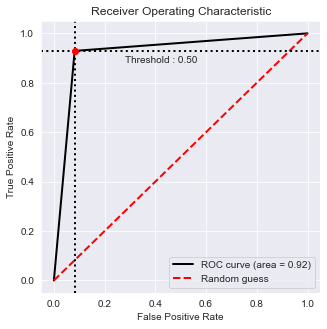

In [474]:
bc = BinaryClassification(yt, tuleka.predict(Xt), labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [475]:
df_confusion = pd.crosstab(yt, tuleka.predict(Xt), rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted    0    1
Actual             
0          314   28
1           34  445


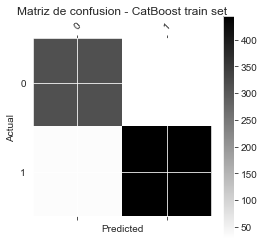

In [476]:
plot_confusion_matrix(df=df_conf_norm, modelo='CatBoost train set') 

In [477]:
df_confusion = pd.crosstab(yv, tuleka.predict(Xv), rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted    0    1
Actual             
0          119   20
1           21  192


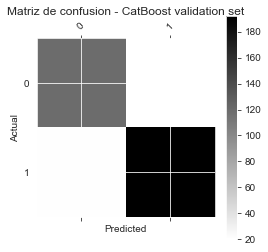

In [478]:
plot_confusion_matrix(df=df_conf_norm, modelo='CatBoost validation set') 